# EMG Signal Processing Assignment

## Setup
    Import necessary libraries: numpy, scipy, matplotlib.

## Part 1: Signal Filtering

    Task: Implement a Butterworth filter to remove high-frequency noise from the EMG signal.
    Task: Compare the frequency response of the original and filtered signals using a frequency plot.

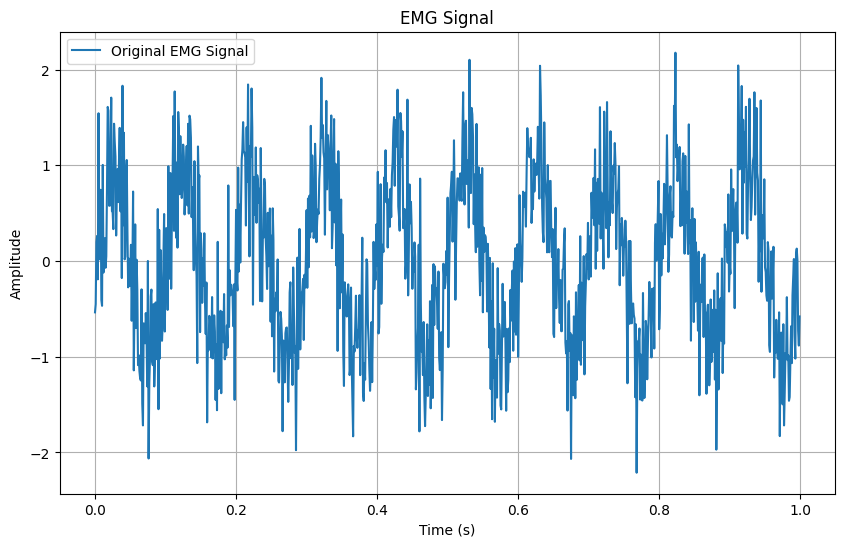

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Generate example EMG signal with noise
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second)
emg_signal = np.sin(2*np.pi*10*t) + 0.5*np.random.randn(len(t))

# Plot original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, emg_signal, label='Original EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
#Implement Butterworth filter or any other best suited filter.
def butter_lowpass(emg_signal,fs):
    cutoff=2
    order=2
    nyq=fs*0.5
    norcutoff=cutoff/nyq
    b,a=butter(order,norcutoff,btype='low',analog=Flase)
    y=filtfilt(b,a,emg_signal)
    return y

In [5]:
#Compare the frequency response of the original and filtered signals using a frequency plot.
y=butter_lowpass(emg_signal,fs)
fig=go.Figure()
fig.add_trace(go.scatter(y=emg_signal,line=dict(shape='spline'),name='signal with noise'))
fig.add_trace(go.scatter(y=y,line=dict(shape='spline'),name='filtered signal'))
fig.show()


## Part 2: Peak Detection

    Task: Utilize scipy.signal.find_peaks to detect peaks in the filtered EMG signal.
    Question: What parameters can be adjusted in find_peaks function to improve peak detection accuracy?
    Task: Plot the original signal with markers indicating the detected peaks.

Answer the Question here:

In [26]:
#

## Part 3: Peak Start and End Time Detection

    Task: Develop a method to determine the start and end times of each detected peak.
    Question: Why is it necessary to identify the precise onset and offset times of muscle activation in EMG signals?
    Task: Visualize the original signal with annotated start and end times of peaks.

Answer the Question here:

In [27]:
#

## Part 4: Envelope Extraction

    Task: Implement the Hilbert transform to extract the envelope of the filtered EMG signal.
    Question: What information does the envelope of an EMG signal provide about muscle activity?
    Task: Plot the original signal overlaid with its envelope.

Answer the Question here:

In [28]:
#

## Part 5: Time Domain Analysis

    Task: Calculate key metrics such as mean, variance, and RMS (Root Mean Square) of the cleaned EMG signal.
    Task: Interpret the calculated metrics in the context of muscle activity and signal characteristics.

In [18]:
# Calculate key metrics.


Interpretation:
- Mean: A higher mean value may suggest increased muscle activation, while a lower mean value may indicate reduced muscle activity.
- Variance: Higher variance may indicate greater variability in muscle activation, possibly due to changes in force production or signal noise.
- RMS: A higher RMS value corresponds to stronger muscle contractions, while a lower RMS value suggests weaker muscle activity.
These interpretations can provide insights into muscle performance, fatigue, and overall neuromuscular function.

## Part 6: Frequency Domain Analysis

    Task: Apply the Fast Fourier Transform (FFT) to analyze the frequency components of the cleaned EMG signal.
    Task: Plot the frequency spectrum of the EMG signal and identify prominent frequency peaks.